# **Maximum Absolute Scaling with Sklearn**
In this procidure we calculate, **x_scaled = x / x_max**. \\
Maximum Absolute Scaling:

*   does not centers the mean at 0
*   variance varies across variables
*   may not Presarve the shape of the original distribution. 
*   sensitive outliers.




In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Weapon for standardisation 
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

In [22]:
# Load Boston House price dataset
data = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)

# Target variable 
data['MEDV'] = load_boston().target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
# Separate data into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis = 1), data.MEDV, test_size = .30, random_state = 333)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [26]:
# Set up the weapon 
scaler_maxabs = MaxAbsScaler()

# Fit the scaler with the train set.
scaler_maxabs.fit(X_train)

# Transform Train and Test Set 
X_train_maxabs = scaler_maxabs.transform(X_train)
X_test_maxabs = scaler_maxabs.transform(X_test)

# Let's the the mean values of train set after standerdization 
print(scaler_maxabs.max_abs_)


[ 88.9762 100.      27.74     1.       0.871    8.725  100.      10.7103
  24.     711.      22.     396.9     37.97  ]


In [0]:
# Represents the results in DataFrame
X_train_maxabs = pd.DataFrame(X_train_maxabs, columns = X_train.columns)
X_test_maxabs = pd.DataFrame(X_test_maxabs, columns = X_test.columns)

In [28]:
# Take a look of before and after statistical significancies:
print(np.round(X_train.describe()), 1)
print('----------------------------------------------------------------------------------------------')
print(np.round(X_train_maxabs.describe()), 1)

        CRIM     ZN  INDUS   CHAS    NOX  ...    RAD    TAX  PTRATIO      B  LSTAT
count  354.0  354.0  354.0  354.0  354.0  ...  354.0  354.0    354.0  354.0  354.0
mean     4.0   11.0   11.0    0.0    1.0  ...   10.0  414.0     19.0  360.0   13.0
std      9.0   23.0    7.0    0.0    0.0  ...    9.0  171.0      2.0   88.0    7.0
min      0.0    0.0    0.0    0.0    0.0  ...    1.0  188.0     13.0    3.0    2.0
25%      0.0    0.0    5.0    0.0    0.0  ...    4.0  280.0     17.0  377.0    7.0
50%      0.0    0.0   10.0    0.0    1.0  ...    5.0  330.0     19.0  392.0   12.0
75%      4.0   12.0   18.0    0.0    1.0  ...   24.0  666.0     20.0  397.0   17.0
max     89.0  100.0   28.0    1.0    1.0  ...   24.0  711.0     22.0  397.0   38.0

[8 rows x 13 columns] 1
----------------------------------------------------------------------------------------------
        CRIM     ZN  INDUS   CHAS    NOX  ...    RAD    TAX  PTRATIO      B  LSTAT
count  354.0  354.0  354.0  354.0  354.0  ...  354

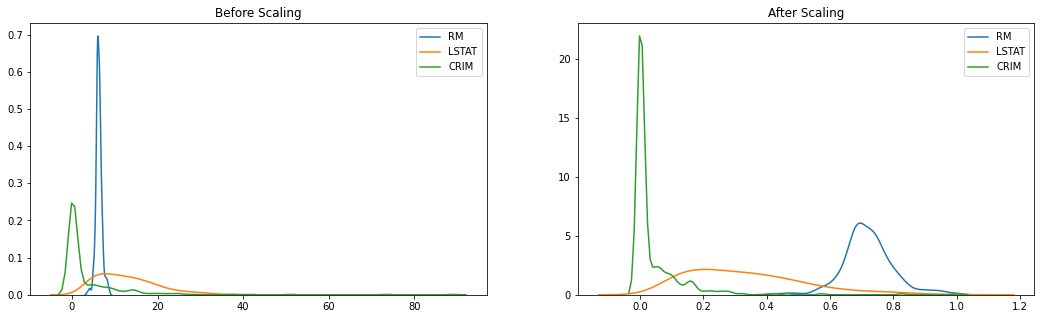

In [29]:
# Visulize the distributions of  before and after standerdization:
fig, (ax1,ax2) = plt.subplots( 1, 2, figsize = (18, 5))

# Before Scaling 
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax = ax1)
sns.kdeplot(X_train['LSTAT'], ax = ax1)
sns.kdeplot(X_train['CRIM'], ax = ax1)

# After Scaling 
ax2.set_title('After Scaling')
sns.kdeplot(X_train_maxabs['RM'], ax = ax2)
sns.kdeplot(X_train_maxabs['LSTAT'], ax = ax2)
sns.kdeplot(X_train_maxabs['CRIM'], ax = ax2)

plt.show()

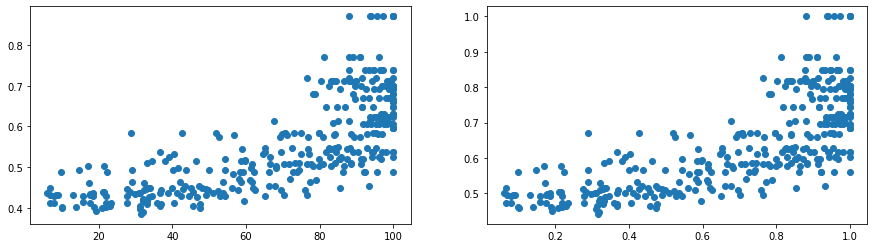

In [30]:
fig,(ax1, ax2) = plt.subplots(1,2,figsize = (15, 4))
ax1.scatter(X_train.AGE, X_train.NOX)
ax2.scatter(X_train_maxabs.AGE, X_train_maxabs.NOX)

# **Quantiles and Median Scaling - RobustScaling**
In this procedure we calculate: **x_scaled = x - x_median / (x_quantile(0.75) - x_quantile(0.25)**. \\
Mean Normalisation:

*   centers the median at 0
*   variance varies across variables.
*   may not preserve the shape of the original distribution
*   the minimum and maximum values vary.
*   robust outliers.





In [33]:
from sklearn.preprocessing import RobustScaler
# Set up the weapon 
scaler_robust = RobustScaler()

# Fit the scaler with the train set.
scaler_robust.fit(X_train)

# Transform Train and Test Set 
X_train_robust = scaler_robust.transform(X_train)
X_test_robust = scaler_robust.transform(X_test)

# Let's the the median values of train set after scaling. 
print(scaler_robust.center_)

# Let's the the IQR values of train set after scaling. 
print(scaler_robust.scale_)

[2.73975e-01 0.00000e+00 9.69000e+00 0.00000e+00 5.38000e-01 6.22900e+00
 8.01000e+01 3.09220e+00 5.00000e+00 3.30000e+02 1.91000e+01 3.91600e+02
 1.15250e+01]
[4.2431775e+00 1.2500000e+01 1.2910000e+01 1.0000000e+00 1.8100000e-01
 7.3500000e-01 4.8175000e+01 3.0511750e+00 2.0000000e+01 3.8575000e+02
 2.8000000e+00 2.0192500e+01 1.0115000e+01]


In [34]:
# Transformed the returned NumPy array to dataframe
X_train_robust = pd.DataFrame(X_train_robust, columns = X_train.columns)
X_test_robust = pd.DataFrame(X_test_robust, columns = X_test.columns)

print(np.round(X_train.median()), 1)
print('----------------------------------------------------------------------------------')
print(np.round(X_train_robust.median()), 1)

CRIM         0.0
ZN           0.0
INDUS       10.0
CHAS         0.0
NOX          1.0
RM           6.0
AGE         80.0
DIS          3.0
RAD          5.0
TAX        330.0
PTRATIO     19.0
B          392.0
LSTAT       12.0
dtype: float64 1
----------------------------------------------------------------------------------
CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS       -0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B         -0.0
LSTAT      0.0
dtype: float64 1


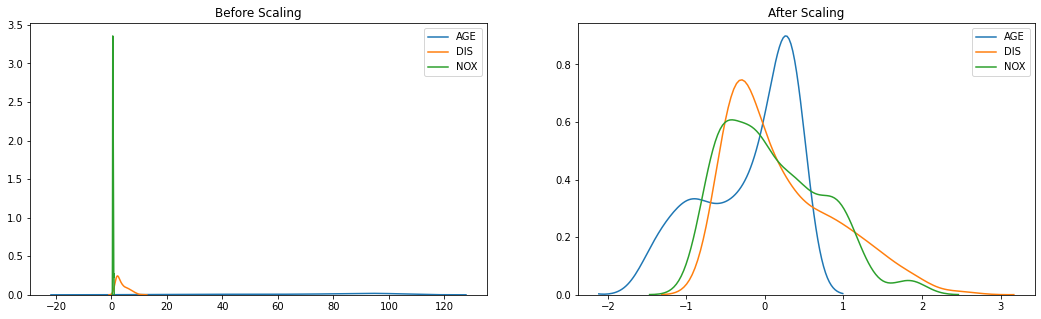

In [35]:
# Visulize the distributions of  before and after mean normalisation:
fig, (ax1,ax2) = plt.subplots( 1, 2, figsize = (18, 5))

# Before Scaling 
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax = ax1)
sns.kdeplot(X_train['DIS'], ax = ax1)
sns.kdeplot(X_train['NOX'], ax = ax1)

# After Scaling 
ax2.set_title('After Scaling')
sns.kdeplot(X_train_robust['AGE'], ax = ax2)
sns.kdeplot(X_train_robust['DIS'], ax = ax2)
sns.kdeplot(X_train_robust['NOX'], ax = ax2)

plt.show()

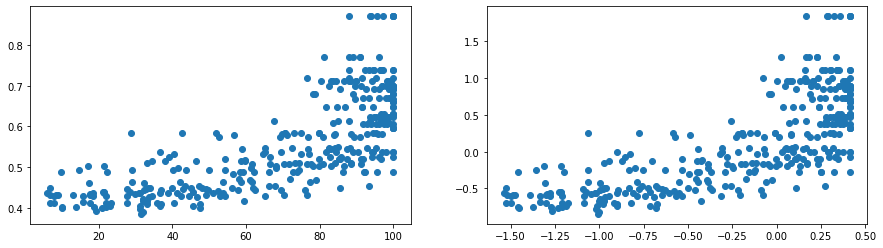

In [36]:
fig,(ax1, ax2) = plt.subplots(1,2,figsize = (15, 4))
ax1.scatter(X_train.AGE, X_train.NOX)
ax2.scatter(X_train_robust.AGE, X_train_robust.NOX)

# **Unit Length Scaling with Sklearn**
Scaling to unit norm is achieved by dividing each feature vector by either the L1-norm (Manhattan Distance) or L2-norm (Euclidean Distance). \\
**x_scaled_l1 = x / l1(x)** \\
**x_scaled_l2 = x / l2(x)**

L1 Norm

In [44]:
from sklearn.preprocessing import Normalizer

# Set up the scaler
scaler_l1 = Normalizer(norm = 'l1')

# Fit the scaler to the train set.
scaler_l1.fit(X_train)

# Transform train and test sets
X_train_l1 = scaler_l1.transform(X_train)
X_test_l1 = scaler_l1.transform(X_test)

# Calculate the norm for each observation 
print(np.round(np.linalg.norm(X_train, ord=1, axis=1), 1))
print('--------------------------------------------------------------------------')
print(np.round(np.linalg.norm(X_train_l1, ord=1, axis=1), 1))

[ 750.7  724.4 1258.  1276.5 1222.2  757.6 1277.2 1210.9 1238.2  778.9
  952.  1268.4  847.5  940.8 1265.8 1227.4  830.6 1216.7 1248.6  936.3
  832.1 1285.3  875.9 1255.2 1005.   912.4  808.3 1237.1 1264.7 1239.6
  859.6  810.8  877.7  825.1  739.5  837.6  866.   748.3  719.   808.7
  807.6  826.7  977.9  774.1  841.3  887.2  934.3 1218.9  817.5  809.5
 1239.  1219.9  730.4 1284.7  827.8  898.3  651.4  830.4  738.4 1226.7
  941.6 1104.8  857.7 1182.1  815.2  832.4 1000.2  804.6  920.1  779.9
  924.9 1004.   843.4  790.3 1216.7  716.7  984.6  818.1  839.7  777.
  726.4 1237.2  792.9  759.2  872.3  776.4  802.6  783.6  842.6  912.4
  748.9 1003.5  775.9  810.9  846.7  810.2  829.2 1118.   988.8  763.5
 1260.9 1095.3  807.4  800.7  890.6  880.6 1185.2  825.9  734.   851.7
  802.1  854.6  895.3 1188.5  801.3  816.9  788.   669.1  807.1  925.9
  701.2  931.3  958.4  717.7 1000.4  820.9  838.1  876.5  769.3 1212.9
  798.3  847.1 1253.8  791.9  785.5  794.1 1265.5 1175.9  926.2  804.6
 1260.5

In [45]:
# Transformed the returned NumPy array to dataframe
X_train_l1 = pd.DataFrame(X_train_l1, columns = X_train.columns)
X_test_l1 = pd.DataFrame(X_test_l1, columns = X_test.columns)

print(np.round(X_train.describe()), 1)
print('----------------------------------------------------------------------------------')
print(np.round(X_train_l1.describe()), 1)

        CRIM     ZN  INDUS   CHAS    NOX  ...    RAD    TAX  PTRATIO      B  LSTAT
count  354.0  354.0  354.0  354.0  354.0  ...  354.0  354.0    354.0  354.0  354.0
mean     4.0   11.0   11.0    0.0    1.0  ...   10.0  414.0     19.0  360.0   13.0
std      9.0   23.0    7.0    0.0    0.0  ...    9.0  171.0      2.0   88.0    7.0
min      0.0    0.0    0.0    0.0    0.0  ...    1.0  188.0     13.0    3.0    2.0
25%      0.0    0.0    5.0    0.0    0.0  ...    4.0  280.0     17.0  377.0    7.0
50%      0.0    0.0   10.0    0.0    1.0  ...    5.0  330.0     19.0  392.0   12.0
75%      4.0   12.0   18.0    0.0    1.0  ...   24.0  666.0     20.0  397.0   17.0
max     89.0  100.0   28.0    1.0    1.0  ...   24.0  711.0     22.0  397.0   38.0

[8 rows x 13 columns] 1
----------------------------------------------------------------------------------
        CRIM     ZN  INDUS   CHAS    NOX  ...    RAD    TAX  PTRATIO      B  LSTAT
count  354.0  354.0  354.0  354.0  354.0  ...  354.0  354.0   

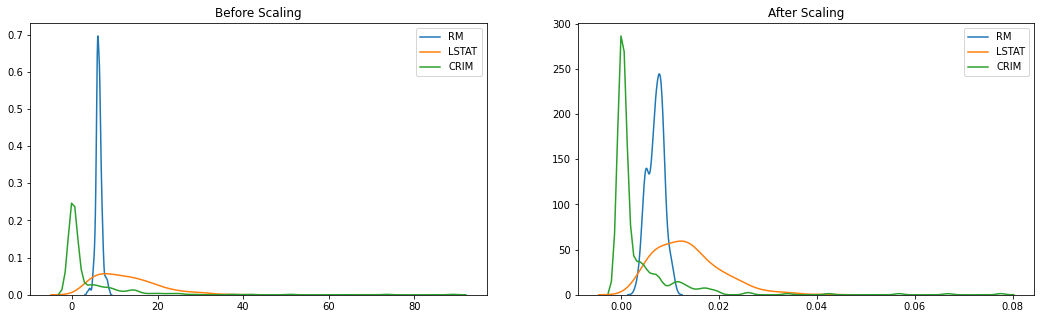

In [46]:
# Visulize the distributions of  before and after min-max Scaling:
fig, (ax1,ax2) = plt.subplots( 1, 2, figsize = (18, 5))

# Before Scaling 
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax = ax1)
sns.kdeplot(X_train['LSTAT'], ax = ax1)
sns.kdeplot(X_train['CRIM'], ax = ax1)

# After Scaling 
ax2.set_title('After Scaling')
sns.kdeplot(X_train_l1['RM'], ax = ax2)
sns.kdeplot(X_train_l1['LSTAT'], ax = ax2)
sns.kdeplot(X_train_l1['CRIM'], ax = ax2)

plt.show()

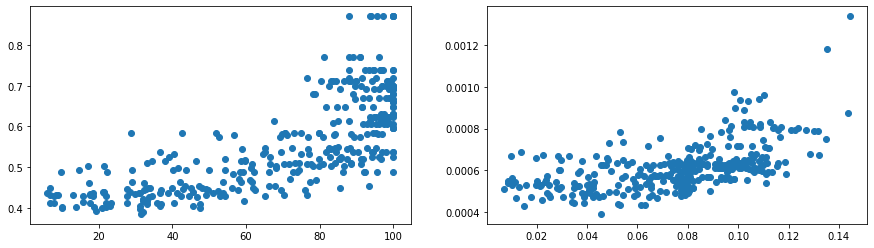

In [47]:
fig,(ax1, ax2) = plt.subplots(1,2,figsize = (15, 4))
ax1.scatter(X_train.AGE, X_train.NOX)
ax2.scatter(X_train_l1.AGE, X_train_l1.NOX)

L2 Norm

In [48]:
# Set up the scaler
scaler_l2 = Normalizer(norm = 'l2')

# Fit the scaler to the train set.
scaler_minmax.fit(X_train)

# Transform train and test sets
X_train_l2 = scaler_l2.transform(X_train)
X_test_l2 = scaler_l2.transform(X_test)

# Calculate the norm for each observation 
print(np.round(np.linalg.norm(X_train, ord=1, axis=1), 1))
print('--------------------------------------------------------------------------')
print(np.round(np.linalg.norm(X_train_l2, ord=1, axis=1), 1))

[ 750.7  724.4 1258.  1276.5 1222.2  757.6 1277.2 1210.9 1238.2  778.9
  952.  1268.4  847.5  940.8 1265.8 1227.4  830.6 1216.7 1248.6  936.3
  832.1 1285.3  875.9 1255.2 1005.   912.4  808.3 1237.1 1264.7 1239.6
  859.6  810.8  877.7  825.1  739.5  837.6  866.   748.3  719.   808.7
  807.6  826.7  977.9  774.1  841.3  887.2  934.3 1218.9  817.5  809.5
 1239.  1219.9  730.4 1284.7  827.8  898.3  651.4  830.4  738.4 1226.7
  941.6 1104.8  857.7 1182.1  815.2  832.4 1000.2  804.6  920.1  779.9
  924.9 1004.   843.4  790.3 1216.7  716.7  984.6  818.1  839.7  777.
  726.4 1237.2  792.9  759.2  872.3  776.4  802.6  783.6  842.6  912.4
  748.9 1003.5  775.9  810.9  846.7  810.2  829.2 1118.   988.8  763.5
 1260.9 1095.3  807.4  800.7  890.6  880.6 1185.2  825.9  734.   851.7
  802.1  854.6  895.3 1188.5  801.3  816.9  788.   669.1  807.1  925.9
  701.2  931.3  958.4  717.7 1000.4  820.9  838.1  876.5  769.3 1212.9
  798.3  847.1 1253.8  791.9  785.5  794.1 1265.5 1175.9  926.2  804.6
 1260.5

In [49]:
# Transformed the returned NumPy array to dataframe
X_train_l2 = pd.DataFrame(X_train_l2, columns = X_train.columns)
X_test_l2 = pd.DataFrame(X_test_l2, columns = X_test.columns)

print(np.round(X_train.describe()), 1)
print('----------------------------------------------------------------------------------')
print(np.round(X_train_l2.describe()), 1)

        CRIM     ZN  INDUS   CHAS    NOX  ...    RAD    TAX  PTRATIO      B  LSTAT
count  354.0  354.0  354.0  354.0  354.0  ...  354.0  354.0    354.0  354.0  354.0
mean     4.0   11.0   11.0    0.0    1.0  ...   10.0  414.0     19.0  360.0   13.0
std      9.0   23.0    7.0    0.0    0.0  ...    9.0  171.0      2.0   88.0    7.0
min      0.0    0.0    0.0    0.0    0.0  ...    1.0  188.0     13.0    3.0    2.0
25%      0.0    0.0    5.0    0.0    0.0  ...    4.0  280.0     17.0  377.0    7.0
50%      0.0    0.0   10.0    0.0    1.0  ...    5.0  330.0     19.0  392.0   12.0
75%      4.0   12.0   18.0    0.0    1.0  ...   24.0  666.0     20.0  397.0   17.0
max     89.0  100.0   28.0    1.0    1.0  ...   24.0  711.0     22.0  397.0   38.0

[8 rows x 13 columns] 1
----------------------------------------------------------------------------------
        CRIM     ZN  INDUS   CHAS    NOX  ...    RAD    TAX  PTRATIO      B  LSTAT
count  354.0  354.0  354.0  354.0  354.0  ...  354.0  354.0   

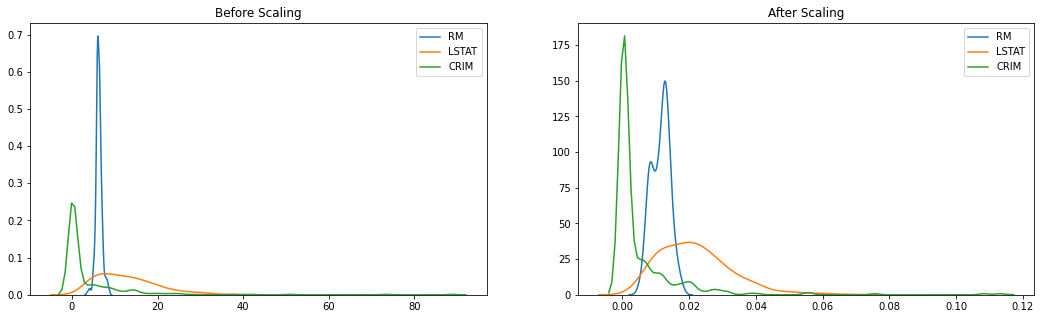

In [50]:
# Visulize the distributions of  before and after Scaling:
fig, (ax1,ax2) = plt.subplots( 1, 2, figsize = (18, 5))

# Before Scaling 
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax = ax1)
sns.kdeplot(X_train['LSTAT'], ax = ax1)
sns.kdeplot(X_train['CRIM'], ax = ax1)

# After Scaling 
ax2.set_title('After Scaling')
sns.kdeplot(X_train_l2['RM'], ax = ax2)
sns.kdeplot(X_train_l2['LSTAT'], ax = ax2)
sns.kdeplot(X_train_l2['CRIM'], ax = ax2)

plt.show()

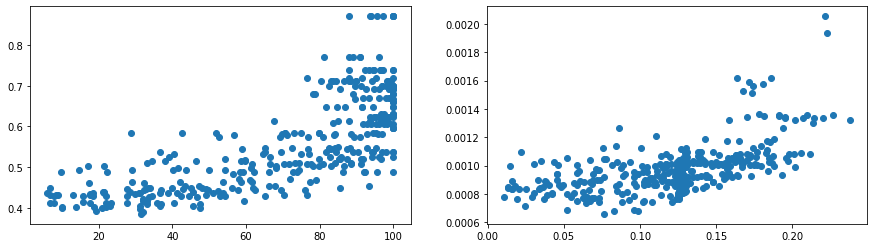

In [51]:
fig,(ax1, ax2) = plt.subplots(1,2,figsize = (15, 4))
ax1.scatter(X_train.AGE, X_train.NOX)
ax2.scatter(X_train_l2.AGE, X_train_l2.NOX)